# Data Understanding

In this notebook, we will perform initial data understanding and visualizations to understand the dataset better.  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

### Data Dictionary

| Variable name       | Role | Type | Group | List (Range) of values | Demographic | Description |
|---------------------|------|------|-------|------------------------|-------------|-------------|
| name                |Identifier   |Categorical      |-       |Hanoi|Geographic|Identifies the specific weather station or location where the data was recorded.|
| datetime            |Feature      |Datetime      |-       |2015-01-01 to 2025-10-01|Time|Represents the date of daily recorded weather data. Used for time-series analysis.|
| tempmax             |Feature      |Numeric (float)      |Temperature|8°C -> 42°C|Climate|The highest air temperature measured during the day. Indicates daytime heat intensity.|
| tempmin             |Feature      |Numeric (float)      |Temperature|5°C -> 30°C|Climate|The lowest air temperature measured during the day. Represents nighttime cooling conditions.|
| temp                |Target       |Numeric (float)      |Temperature|7°C -> 36°C|Climate|The average daily air temperature, serves as the target variable for modeling.|
| feelslikemax        |Feature      |Numeric (float)      |Temperature|8°C -> 51°C|Climate|The maximum “feels like” temperature perceived by humans, adjusted for humidity, wind, and radiation.|
| feelslikemin        |Feature      |Numeric (float)      |Temperature|2°C -> 35°C|Climate|The minimum “feels like” temperature, reflecting perceived cold during the day or night.|
| feelslike           |Feature      |Numeric (float)      |Temperature|5°C -> 47°C|Climate|The average “feels like” temperature of the day — a more realistic indicator of human thermal comfort.|
| dew                 |Feature      |Numeric (float)      |Humidity|-2°C -> 29°C|Atmospheric|The dew point temperature — the level at which moisture in the air begins to condense. Strongly related to humidity|
| humidity            |Feature      |Numeric (float)      |Humidity|30% -> 100%|Atmospheric|The average relative humidity of the day. Indicates the amount of moisture in the air, influencing how temperature feels.|
| precip              |      |      |       |                        |             |             |
| precipprob          |      |      |       |                        |             |             |
| precipcover         |      |      |       |                        |             |             |
| preciptype          |      |      |       |                        |             |             |
| snow                |      |      |       |                        |             |             |
| snowdepth           |      |      |       |                        |             |             |
| windgust            |      |      |       |                        |             |             |
| windspeed           |      |      |       |                        |             |             |
| winddir             |      |      |       |                        |             |             |
| sealevelpressure    |      |      |       |                        |             |             |
| cloudcover          |      |      |       |                        |             |             |
| visibility          |      |      |       |                        |             |             |
| solarradiation      |      |      |       |                        |             |             |
| solarenergy         |      |      |       |                        |             |             |
| uvindex             |      |      |       |                        |             |             |
| severerisk          |      |      |       |                        |             |             |
| sunrise             |      |      |       |                        |             |             |
| sunset              |      |      |       |                        |             |             |
| moonphase           |      |      |       |                        |             |             |
| conditions          |      |      |       |                        |             |             |
| description         |      |      |       |                        |             |             |
| icon                |      |      |       |                        |             |             |
| stations            |      |      |       |                        |             |             |

# I. Data daily

In [2]:
# Load the dataset
df_daily = pd.read_excel(r"../data/raw/hanoi_daily.xlsx")

print("Shape of data:", df_daily.shape)
df_daily.head()

Shape of data: (3927, 33)


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Hanoi,2015-01-01,24.0,11.4,17.7,24.0,11.4,17.7,9.4,63.8,0.0,0,0.0,NaN,0,0,25.2,13.0,78.3,1023.4,0.4,7.2,197.4,17.1,7,NaN,2015-01-01T06:33:34,2015-01-01T17:26:18,0.36,Clear,Clear conditions throughout the day.,clear-day,"48820099999,48823099999,48825099999,4883109999..."
1,Hanoi,2015-01-02,22.0,11.0,16.3,22.0,11.0,16.3,9.4,65.6,0.0,0,0.0,NaN,0,0,23.4,13.9,99.8,1022.7,28.3,7.7,187.6,16.2,7,NaN,2015-01-02T06:33:53,2015-01-02T17:26:56,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48820099999,48823099999,48825099999,4883109999..."
2,Hanoi,2015-01-03,21.0,13.1,17.0,21.0,13.1,17.0,12.4,75.6,0.0,0,0.0,NaN,0,0,21.6,13.0,97.0,1020.0,42.0,6.0,115.5,9.9,4,NaN,2015-01-03T06:34:11,2015-01-03T17:27:34,0.43,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48820099999,48823099999,48825099999,4883109999..."
3,Hanoi,2015-01-04,22.6,16.9,19.3,22.6,16.9,19.3,16.1,82.0,0.6,100,25.0,rain,0,0,25.2,17.2,98.7,1013.5,88.0,6.3,64.3,5.6,3,NaN,2015-01-04T06:34:28,2015-01-04T17:28:12,0.46,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48820099999,48823099999,48825099999,4883109999..."
4,Hanoi,2015-01-05,23.0,18.5,20.4,23.0,18.5,20.4,18.4,88.4,0.0,0,0.0,NaN,0,0,19.1,13.0,85.7,1011.2,90.6,4.2,93.7,7.9,4,NaN,2015-01-05T06:34:44,2015-01-05T17:28:51,0.50,Overcast,Cloudy skies throughout the day.,cloudy,"48820099999,48823099999,48825099999,4883109999..."


In [3]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3927 non-null   object 
 1   datetime          3927 non-null   object 
 2   tempmax           3927 non-null   float64
 3   tempmin           3927 non-null   float64
 4   temp              3927 non-null   float64
 5   feelslikemax      3927 non-null   float64
 6   feelslikemin      3927 non-null   float64
 7   feelslike         3927 non-null   float64
 8   dew               3927 non-null   float64
 9   humidity          3927 non-null   float64
 10  precip            3927 non-null   float64
 11  precipprob        3927 non-null   int64  
 12  precipcover       3927 non-null   float64
 13  preciptype        2885 non-null   object 
 14  snow              3927 non-null   int64  
 15  snowdepth         3927 non-null   int64  
 16  windgust          3927 non-null   float64


In [5]:
# Diagnosing and correcting data types (Lan Anh)

In [6]:
df_daily.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.00000,3927.000000,3927.000000,3927.000000,3927.0,3927.0,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.00000,1361.000000,3927.000000
mean,28.515152,21.934963,24.898370,32.620550,22.703107,27.397021,20.488541,78.27344,5.226019,72.167049,8.221225,0.0,0.0,27.022587,17.394423,126.961268,1011.085358,63.828928,8.605602,155.118386,13.388719,5.84441,28.518736,0.483990
std,5.842098,4.870462,5.139137,9.530943,6.075115,7.734238,5.783574,10.76699,15.895322,44.823360,10.936552,0.0,0.0,8.080222,4.999515,97.746225,7.142712,23.636997,1.756703,77.239502,6.676342,2.47802,24.089535,0.288759
min,8.000000,5.900000,7.000000,8.000000,2.100000,4.600000,-2.000000,31.00000,0.000000,0.000000,0.000000,0.0,0.0,7.200000,6.500000,0.000000,991.100000,0.000000,2.400000,0.000000,0.000000,0.00000,5.000000,0.000000
25%,24.100000,18.000000,21.000000,24.100000,18.000000,21.000000,16.850000,72.20000,0.000000,0.000000,0.000000,0.0,0.0,21.600000,13.900000,61.900000,1005.200000,49.350000,7.700000,91.100000,7.800000,4.00000,10.000000,0.250000
50%,29.500000,23.000000,26.100000,32.700000,23.000000,27.100000,22.500000,79.80000,0.267000,100.000000,4.170000,0.0,0.0,25.900000,16.600000,109.300000,1010.700000,67.300000,9.000000,154.100000,13.300000,6.00000,10.000000,0.500000
75%,33.000000,26.000000,29.000000,41.300000,26.000000,33.900000,25.200000,85.80000,2.595000,100.000000,12.500000,0.0,0.0,31.000000,20.500000,131.900000,1016.500000,82.300000,9.800000,216.600000,18.700000,8.00000,60.000000,0.750000
max,41.900000,31.000000,35.500000,52.500000,40.400000,46.200000,28.500000,100.00000,333.117000,100.000000,100.000000,0.0,0.0,118.800000,53.600000,359.800000,1037.200000,100.000000,12.600000,323.500000,27.900000,10.00000,100.000000,0.980000


In [7]:
# Nhận xét về các chỉ số thống kê cơ bản, đưa ra nhận định ban đầu (Lan Anh)

In [18]:
# Exploratory Data Analysis (Tùng, Linh)

**1. Temperature group**

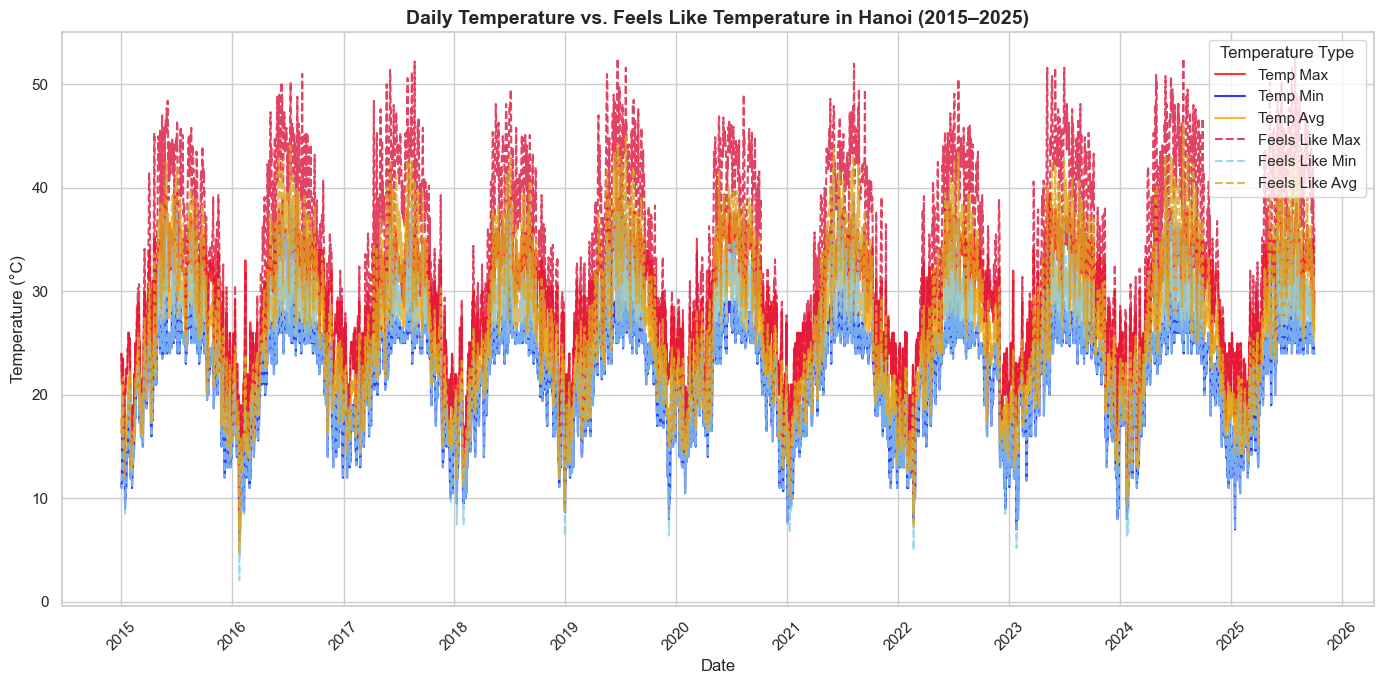

In [ ]:
df_daily['datetime'] = pd.to_datetime(df_daily['datetime'], errors='coerce')
data = df_daily.copy()

plt.figure(figsize=(14, 7))

sns.lineplot(x='datetime', y='tempmax', data=data, label='Temp Max', color='red', alpha=0.8)
sns.lineplot(x='datetime', y='tempmin', data=data, label='Temp Min', color='blue', alpha=0.8)
sns.lineplot(x='datetime', y='temp', data=data, label='Temp Avg', color='orange', alpha=0.8)

sns.lineplot(x='datetime', y='feelslikemax', data=data, label='Feels Like Max', linestyle='--', color='crimson', alpha=0.8)
sns.lineplot(x='datetime', y='feelslikemin', data=data, label='Feels Like Min', linestyle='--', color='skyblue', alpha=0.8)
sns.lineplot(x='datetime', y='feelslike', data=data, label='Feels Like Avg', linestyle='--', color='goldenrod', alpha=0.8)

plt.title('Daily Temperature vs. Feels Like Temperature in Hanoi (2015–2025)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())      
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 7)))

plt.xticks(rotation=45)
plt.tight_layout()

plt.legend(title='Temperature Type', loc='upper right')
plt.show()


- Temperatures in Hanoi have a clear seasonal cycle, with peaks in summer (May–August) and troughs in winter (December–February).

- The “Feels Like” curve is roughly parallel and coincides with the actual temperature curve, showing a small difference, but is still slightly higher in summer — possibly due to high humidity and the hotter effect.

- The amplitude of fluctuations (the difference between tempmax and tempmin) is larger in the transition months (March–April and September–October), indicating erratic weather.

- Overall, the correlation between actual and felt temperatures is strongly linear, suggesting that the feelslike and temp variables can be combined in the feature engineering step or one of the two can be chosen to represent this group.

**2. Humidity**

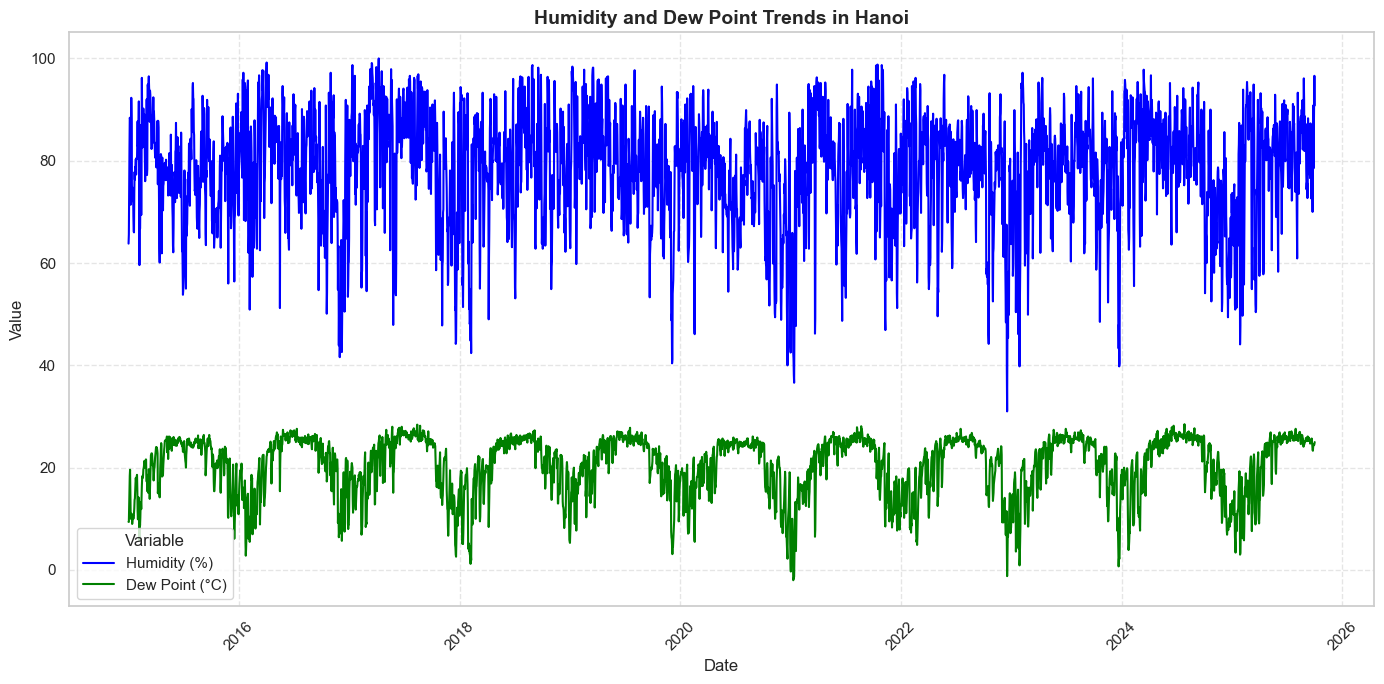

In [14]:
plt.figure(figsize=(14, 7))

sns.lineplot(x='datetime', y='humidity', data=df_daily, label='Humidity (%)', color='blue')
sns.lineplot(x='datetime', y='dew', data=df_daily, label='Dew Point (°C)', color='green')

plt.title('Humidity and Dew Point Trends in Hanoi', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Variable')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- Humidity remains high year-round, mostly between 70% and 90%, with occasional drops below 50%. There are frequent short-term spikes and dips, indicating rapid weather changes typical of a humid subtropical climate.

- Dew point follows a strong annual cycle, peaking around 25–27°C during summer and dropping to 5–10°C in winter. This pattern reflects Hanoi’s clear seasonal differences—hot, humid summers and cooler, drier winters.

- The dew point and humidity generally move in the same direction, meaning when one rises, the other tends to increase as well. However, humidity fluctuates more sharply, while dew point changes more smoothly across the seasons.

- Overall, both humidity and dew point show consistent seasonal fluctuations throughout the years. Hanoi maintains a consistently humid climate with clear seasonal dew point variations.

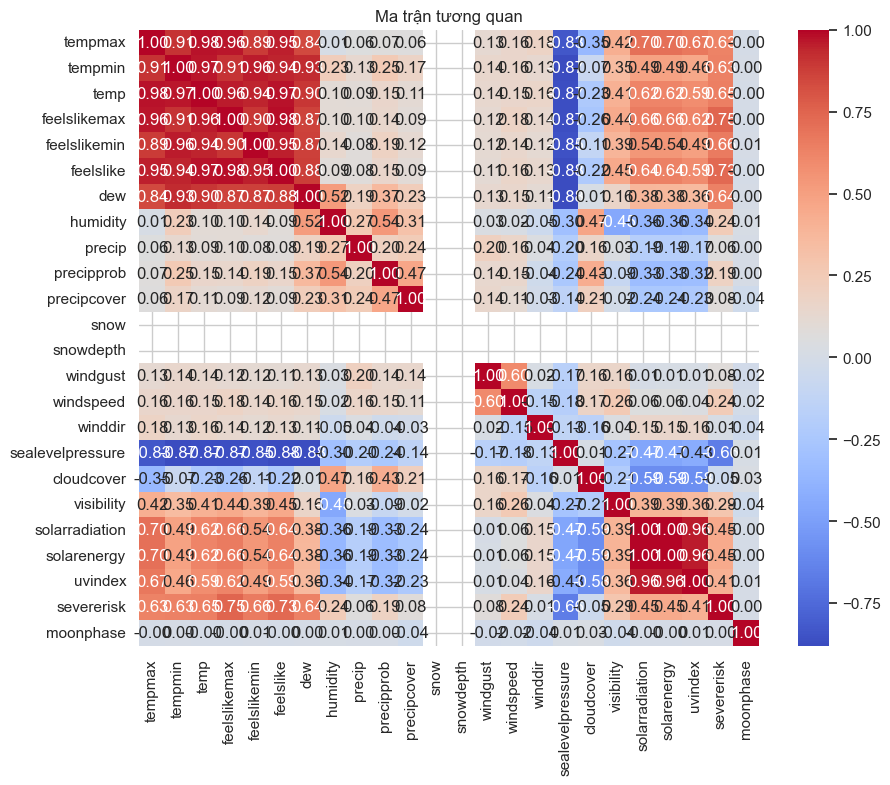

In [ ]:
corr = df_daily.corr(numeric_only=True)  
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan")
plt.show()

In [19]:
# Nhận định quan hệ giữa các biến với target. Có thể xem xét loại bỏ biến nếu high correlation, và đưa ra nhận định ban đầu về các biến tiềm năng (Lan Anh) 
# Vẽ lại ma trận tương quan

# II. Data hourly

In [12]:
# Load the dataset
df_hourly = pd.read_excel(r"../data/raw/hanoi_hourly.xlsx")

print("Shape of data", df_hourly.shape)
df_hourly.head()

Shape of data (94248, 24)


,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,Hanoi,2015-01-01T00:00:00,15.0,15.0,13.0,87.84,0.0,0,NaN,0.0,0.0,11.9,3.6,270.0,1023.0,0.0,3.5,0.0,0.0,0.0,NaN,Clear,clear-night,"48820099999,VVNB"
1,Hanoi,2015-01-01T01:00:00,15.8,15.8,13.0,83.33,0.0,0,NaN,0.0,0.0,11.2,6.4,314.0,1022.6,0.0,8.5,0.0,0.0,0.0,NaN,Clear,clear-night,"48820099999,48825099999,48831099999,VVNB"
2,Hanoi,2015-01-01T02:00:00,13.5,13.5,12.0,90.65,0.0,0,NaN,0.0,0.0,11.2,3.6,90.0,1022.0,0.0,3.0,0.0,0.0,0.0,NaN,Clear,clear-night,"48820099999,VVNB"
3,Hanoi,2015-01-01T03:00:00,13.0,13.0,12.0,93.65,0.0,0,NaN,0.0,0.0,11.2,1.8,329.2,1022.0,0.0,2.0,0.0,0.0,0.0,NaN,Clear,clear-night,VVNB
4,Hanoi,2015-01-01T04:00:00,14.7,14.7,12.5,86.57,0.0,0,NaN,0.0,0.0,10.8,9.2,352.0,1022.4,0.0,8.2,0.0,0.0,0.0,NaN,Clear,clear-night,"48820099999,48825099999,VVNB"


In [13]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94248 entries, 0 to 94247
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              94248 non-null  object 
 1   datetime          94248 non-null  object 
 2   temp              94248 non-null  float64
 3   feelslike         94248 non-null  float64
 4   dew               94248 non-null  float64
 5   humidity          94248 non-null  float64
 6   precip            94209 non-null  float64
 7   precipprob        94248 non-null  int64  
 8   preciptype        12055 non-null  object 
 9   snow              94206 non-null  float64
 10  snowdepth         94206 non-null  float64
 11  windgust          94199 non-null  float64
 12  windspeed         94247 non-null  float64
 13  winddir           94246 non-null  float64
 14  sealevelpressure  94248 non-null  float64
 15  cloudcover        94248 non-null  float64
 16  visibility        94070 non-null  float6

In [14]:
# Diagnosing and correcting data types (Lan Anh)

In [15]:
df_hourly.describe()

,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
count,94248.000000,94248.000000,94248.000000,94248.000000,94209.000000,94248.000000,94206.0,94206.0,94199.000000,94247.000000,94246.000000,94248.000000,94248.000000,94070.000000,94212.000000,94212.000000,94212.000000,32645.000000
mean,24.896258,27.393700,20.485905,78.270513,0.217643,8.245268,0.0,0.0,17.380778,9.318116,142.613537,1011.082052,64.712259,8.599728,155.174609,0.558068,1.545100,17.062031
std,5.613481,8.500585,5.931406,15.748502,2.647468,27.505461,0.0,0.0,7.716193,4.824510,104.672241,7.315970,34.604449,2.848757,235.708445,0.849264,2.370613,15.945075
min,5.900000,2.100000,-8.000000,17.590000,0.000000,0.000000,0.0,0.0,1.100000,0.000000,0.000000,985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,21.000000,21.000000,17.000000,67.360000,0.000000,0.000000,0.0,0.0,11.500000,5.600000,65.000000,1005.000000,36.100000,7.000000,0.000000,0.000000,0.000000,10.000000
50%,25.900000,25.900000,22.400000,81.880000,0.000000,0.000000,0.0,0.0,16.600000,8.500000,115.000000,1010.900000,81.900000,10.000000,5.800000,0.000000,0.000000,10.000000
75%,29.000000,34.200000,25.000000,91.340000,0.000000,0.000000,0.0,0.0,22.000000,12.100000,185.000000,1016.800000,89.900000,10.000000,248.125000,0.900000,2.000000,15.000000
max,41.900000,52.500000,31.000000,100.000000,186.240000,100.000000,0.0,0.0,118.800000,53.600000,360.000000,1041.000000,100.000000,24.100000,1011.900000,3.600000,10.000000,100.000000


In [20]:
# Nhận xét về các chỉ số thống kê cơ bản, đưa ra nhận định ban đầu (Lan Anh)

In [17]:
# Exploratory Data Analysis (Tùng)